In [85]:
from michigrad.engine import Value
from michigrad.visualize import show_graph, show_graph_interactive
import numpy as np




In [86]:
import importlib
import michigrad.nn
importlib.reload(michigrad.nn)
from michigrad.nn import Neuron, Layer, MLP

In [87]:
# Definición de datos de entrada (xs) y las salidas esperadas (ys)

xs = [[Value(0), Value(0)], [Value(0), Value(1)], [Value(1), Value(0)], [Value(1), Value(1)]]
ys = [Value(0), Value(1), Value(1), Value(0)] 


# Definición del modelo
# El modelo XOR devuelve 0 si dos números binarios son iguales y 1 si son distintos
# entonces (0, 0), (1, 1) -> 0; (0, 1), (1, 0) --> 1 

xor_model = MLP(2, [2, 1], nonlin=False) 
    # dos entradas
    # una capa oculta con dos entradas
    # una salida
    # función de activación lineal

In [88]:
for layer in xor_model.layers:
    for neuron in layer.neurons:
        print(neuron)

LinearNeuron(2)
LinearNeuron(2)
LinearNeuron(2)


In [89]:
# Entrenamiento del modelo

lr = 0.01
epochs = 500

# iterar n veces
for _ in range(epochs):

    # forward pass
    yhats = [xor_model(x) for x in xs] # en clase hace xor_model(x)[0]

    # loss (testear si a cada iteración disminuye)
    # calcula el mse de cada combinación del zip
    # divide por 4 para tener el promedio  
    L = sum([(y - yhat)**2 for y, yhat in zip(ys, yhats)])/4

    # zero grad
    for p in xor_model.parameters():
        p.grad = 0.0

    # backward pass
    L.backward()

    # update weights
    for p in xor_model.parameters():
        p.data -= p.grad * lr

    print(L)

Value(data=0.40643079397954185, grad=1, name=)
Value(data=0.3993866115479616, grad=1, name=)
Value(data=0.39268157283720584, grad=1, name=)
Value(data=0.3863008253007162, grad=1, name=)
Value(data=0.38023006124596204, grad=1, name=)
Value(data=0.37445550304503405, grad=1, name=)
Value(data=0.36896388865865837, grad=1, name=)
Value(data=0.3637424574440936, grad=1, name=)
Value(data=0.3587789362218698, grad=1, name=)
Value(data=0.3540615255804785, grad=1, name=)
Value(data=0.3495788864019429, grad=1, name=)
Value(data=0.3453201265946672, grad=1, name=)
Value(data=0.34127478802310324, grad=1, name=)
Value(data=0.33743283362657284, grad=1, name=)
Value(data=0.33378463472207215, grad=1, name=)
Value(data=0.33032095848804927, grad=1, name=)
Value(data=0.32703295562802553, grad=1, name=)
Value(data=0.3239121482145219, grad=1, name=)
Value(data=0.3209504177150781, grad=1, name=)
Value(data=0.3181399932032321, grad=1, name=)
Value(data=0.31547343975817976, grad=1, name=)
Value(data=0.3129436470

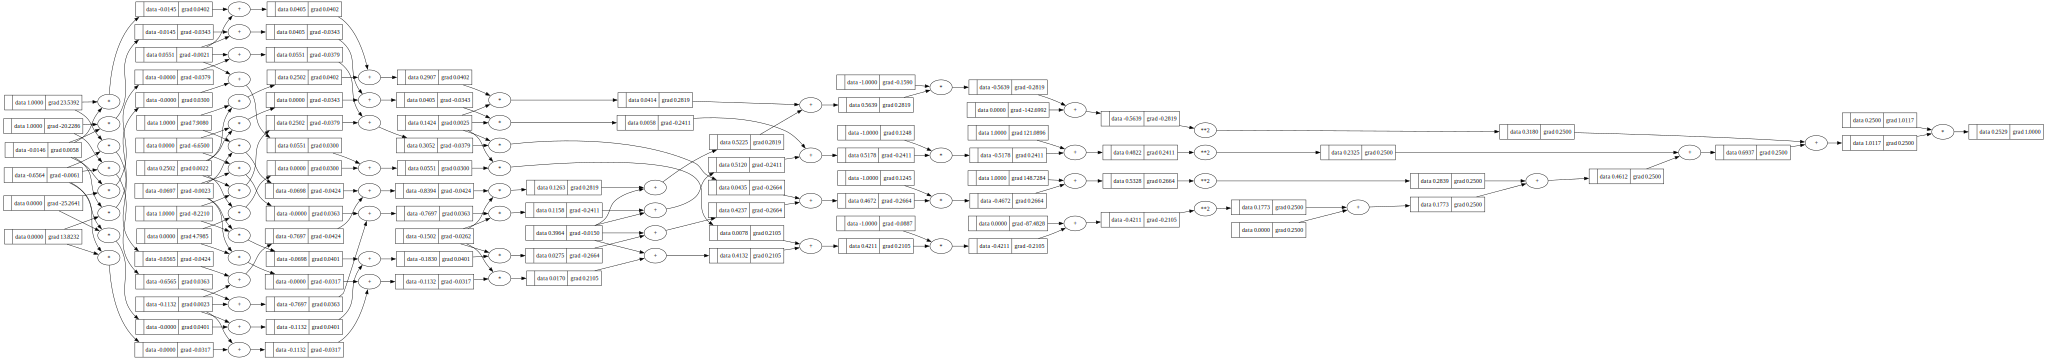

In [ ]:
# Mostrar grafo de pérdida

show_graph(L)